# World Happiness Report Project

## Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

#### You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Assignment_25NOV23\happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Observations
- No null values found
- High standard deviation can be seen in Categorical column (Happiness Rank) and Target variable (Happiness Score)
- Can see slight right skewed in the following columns (Happiness Score, Standard Error, Trust (Government Corruption), Generosity, and Dystopia Residual). However, out of them "Happiness Score" is target variable.
- Can see slight left skewed in the following columns (Happiness Rank, Economy (GDP per Capita), Family, Health (Life Expectancy), and Freedom). However, out of them "Happiness Rank" is the Categorical column".
- May be all seen skewed are in accpetable range, need to confirm the same.
- Can see outliers in the categorical column

In [8]:
categor_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categor_col.append(i)        
    else:
        numerical_col.append(i)
print('Categorical column = ', categor_col)
print('Numerical column = ', numerical_col)

Categorical column =  ['Country', 'Region']
Numerical column =  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


## Using Encoder on categorical columns

In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.9 KB


In [11]:
## Reinvestigate again
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Observations
- No null values found
- High standard deviation can be seen in Categorical columns (Country and Region), Happiness Rank and Target variable (Happiness Score)
- Can see slight right skewed in the following columns (Region, Happiness Score, Standard Error, Trust (Government Corruption), Generosity, and Dystopia Residual). However, out of them "Region" is the categorical column and "Happiness Score" is target variable.
- Can see slight left skewed in the following columns (Happiness Rank, Economy (GDP per Capita), Family, Health (Life Expectancy), and Freedom). However, out of them "Happiness Rank" is the Categorical column".
- Can see outliers in the categorical column (Country) and Target variable (Happiness Score).

In [12]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


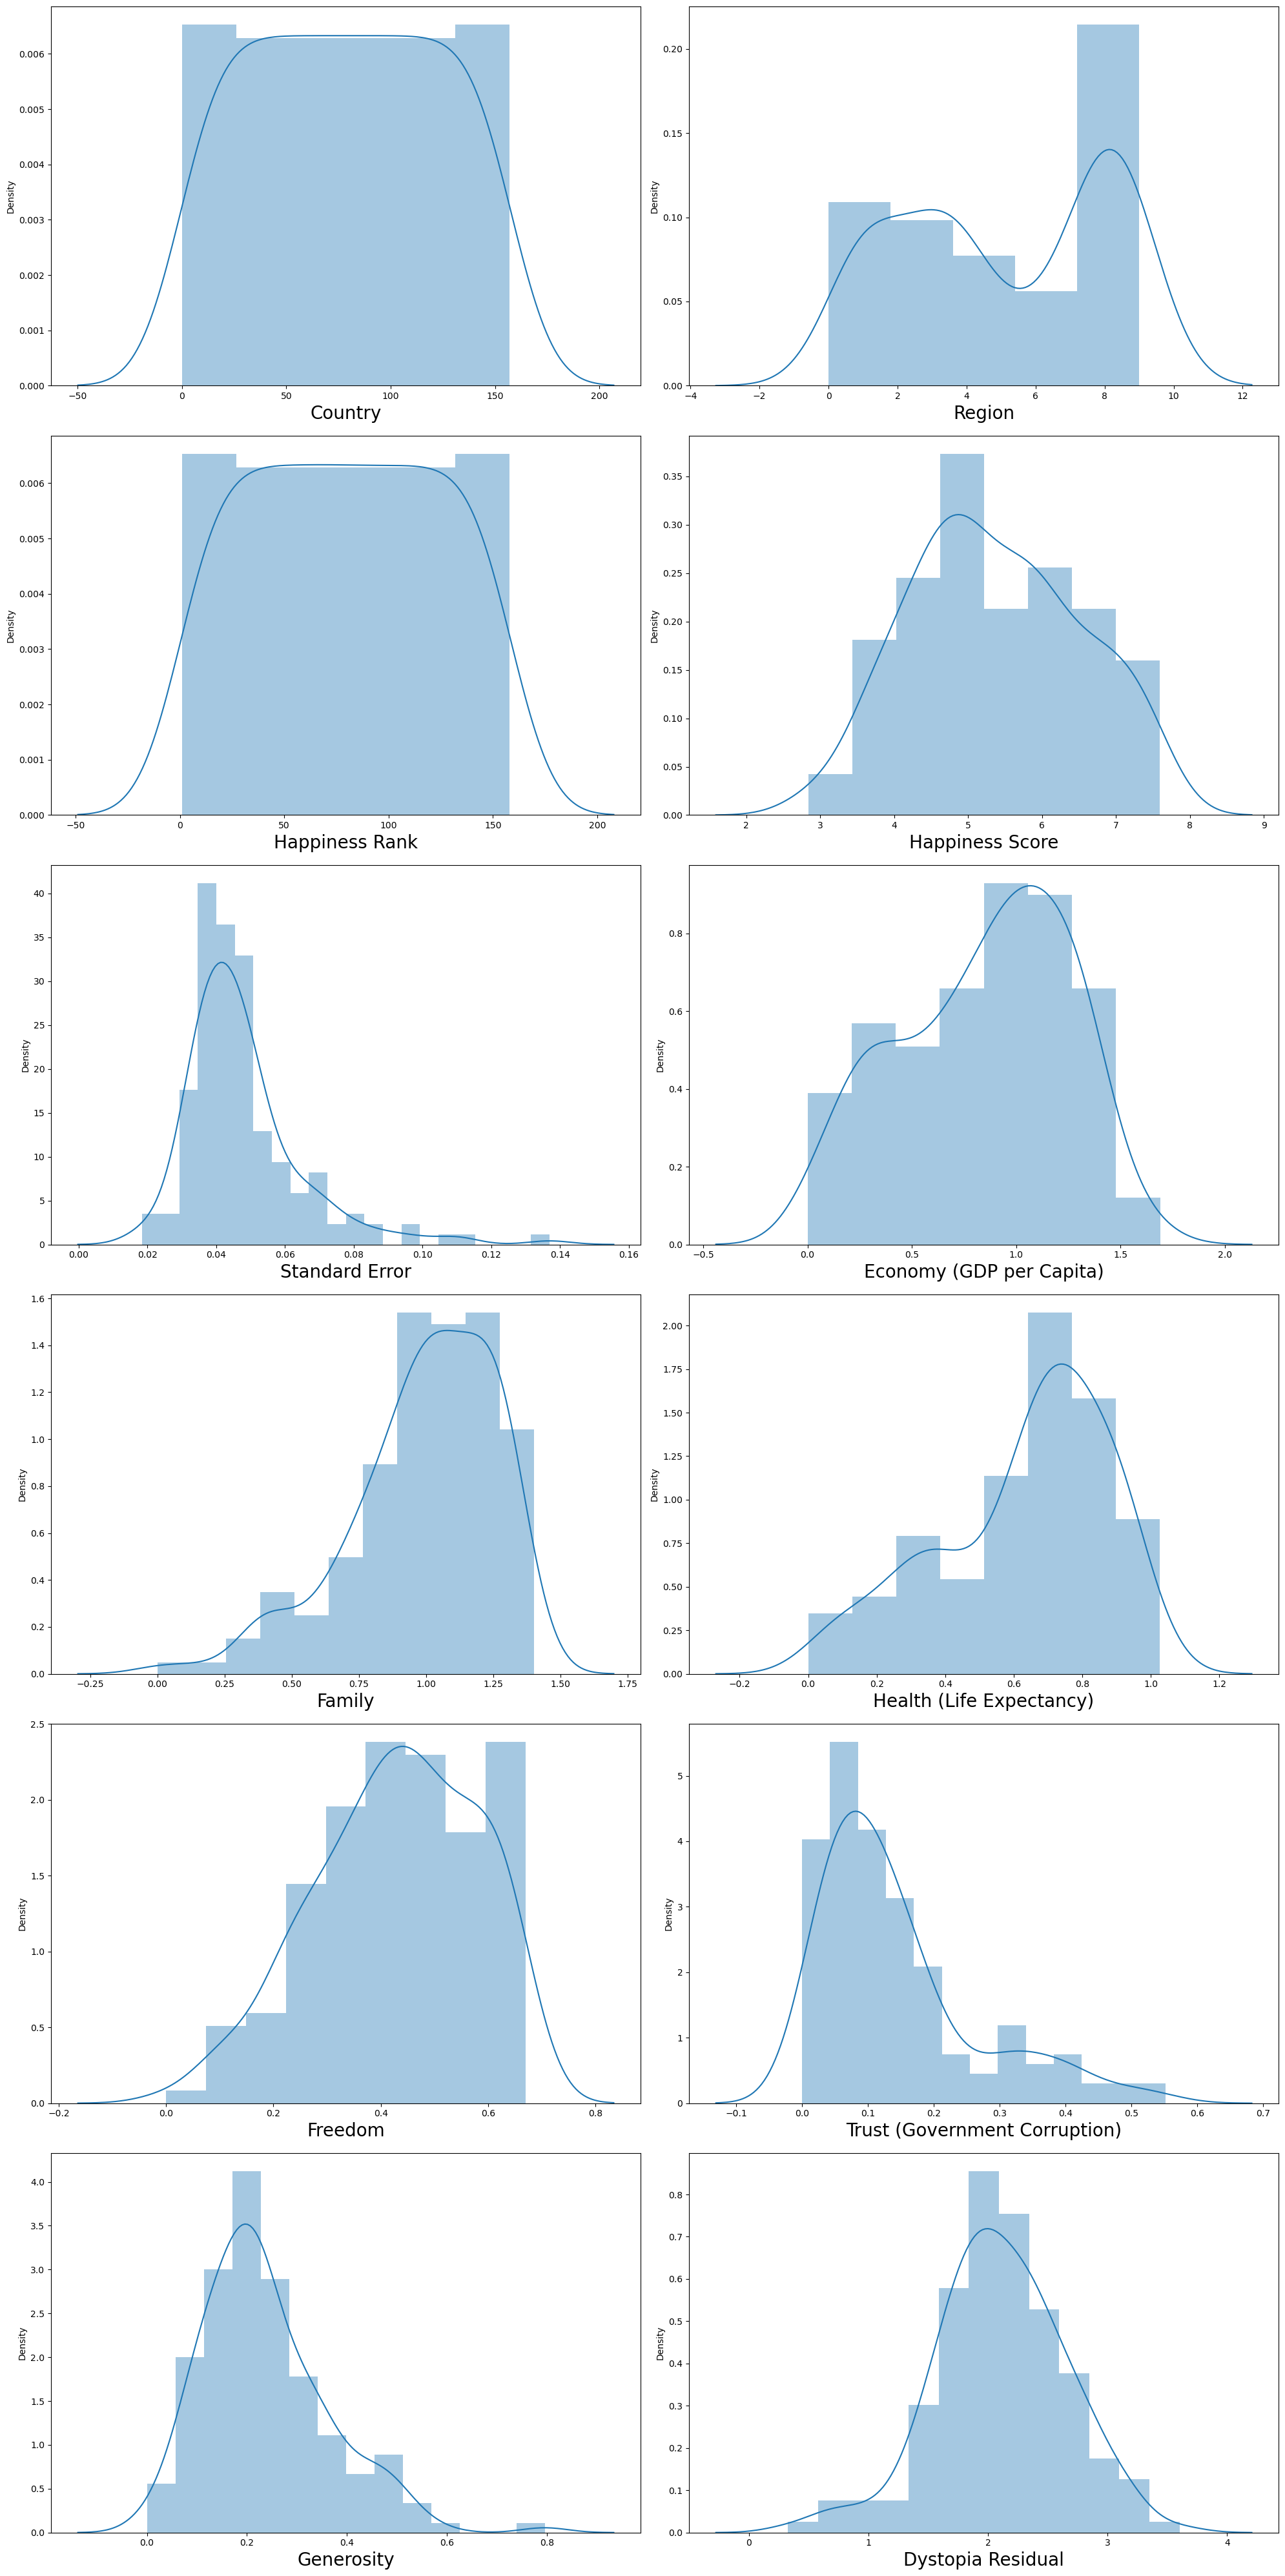

In [13]:
## Check Relationship between columns
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in df.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1 
plt.tight_layout()  

### Observations
- Can see right skewness in following columns (Standard Error, Trust (Government Corruption), and Generosity) 
- Can see left skweness in following columns (Family, Health (Life Expectancy), Freedom, and Dystopia Residual) 

In [14]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

### Observations:
- Its confirmed right skewness in following columns (Standard Error, Trust (Government Corruption), and Generosity).
- Its confirmed left skewness in following columns (Family, and Health (Life Expectancy))

In [15]:
### Seperates features and label to check relationship
x = df.drop('Happiness Score', axis =1)
y = df['Happiness Score']

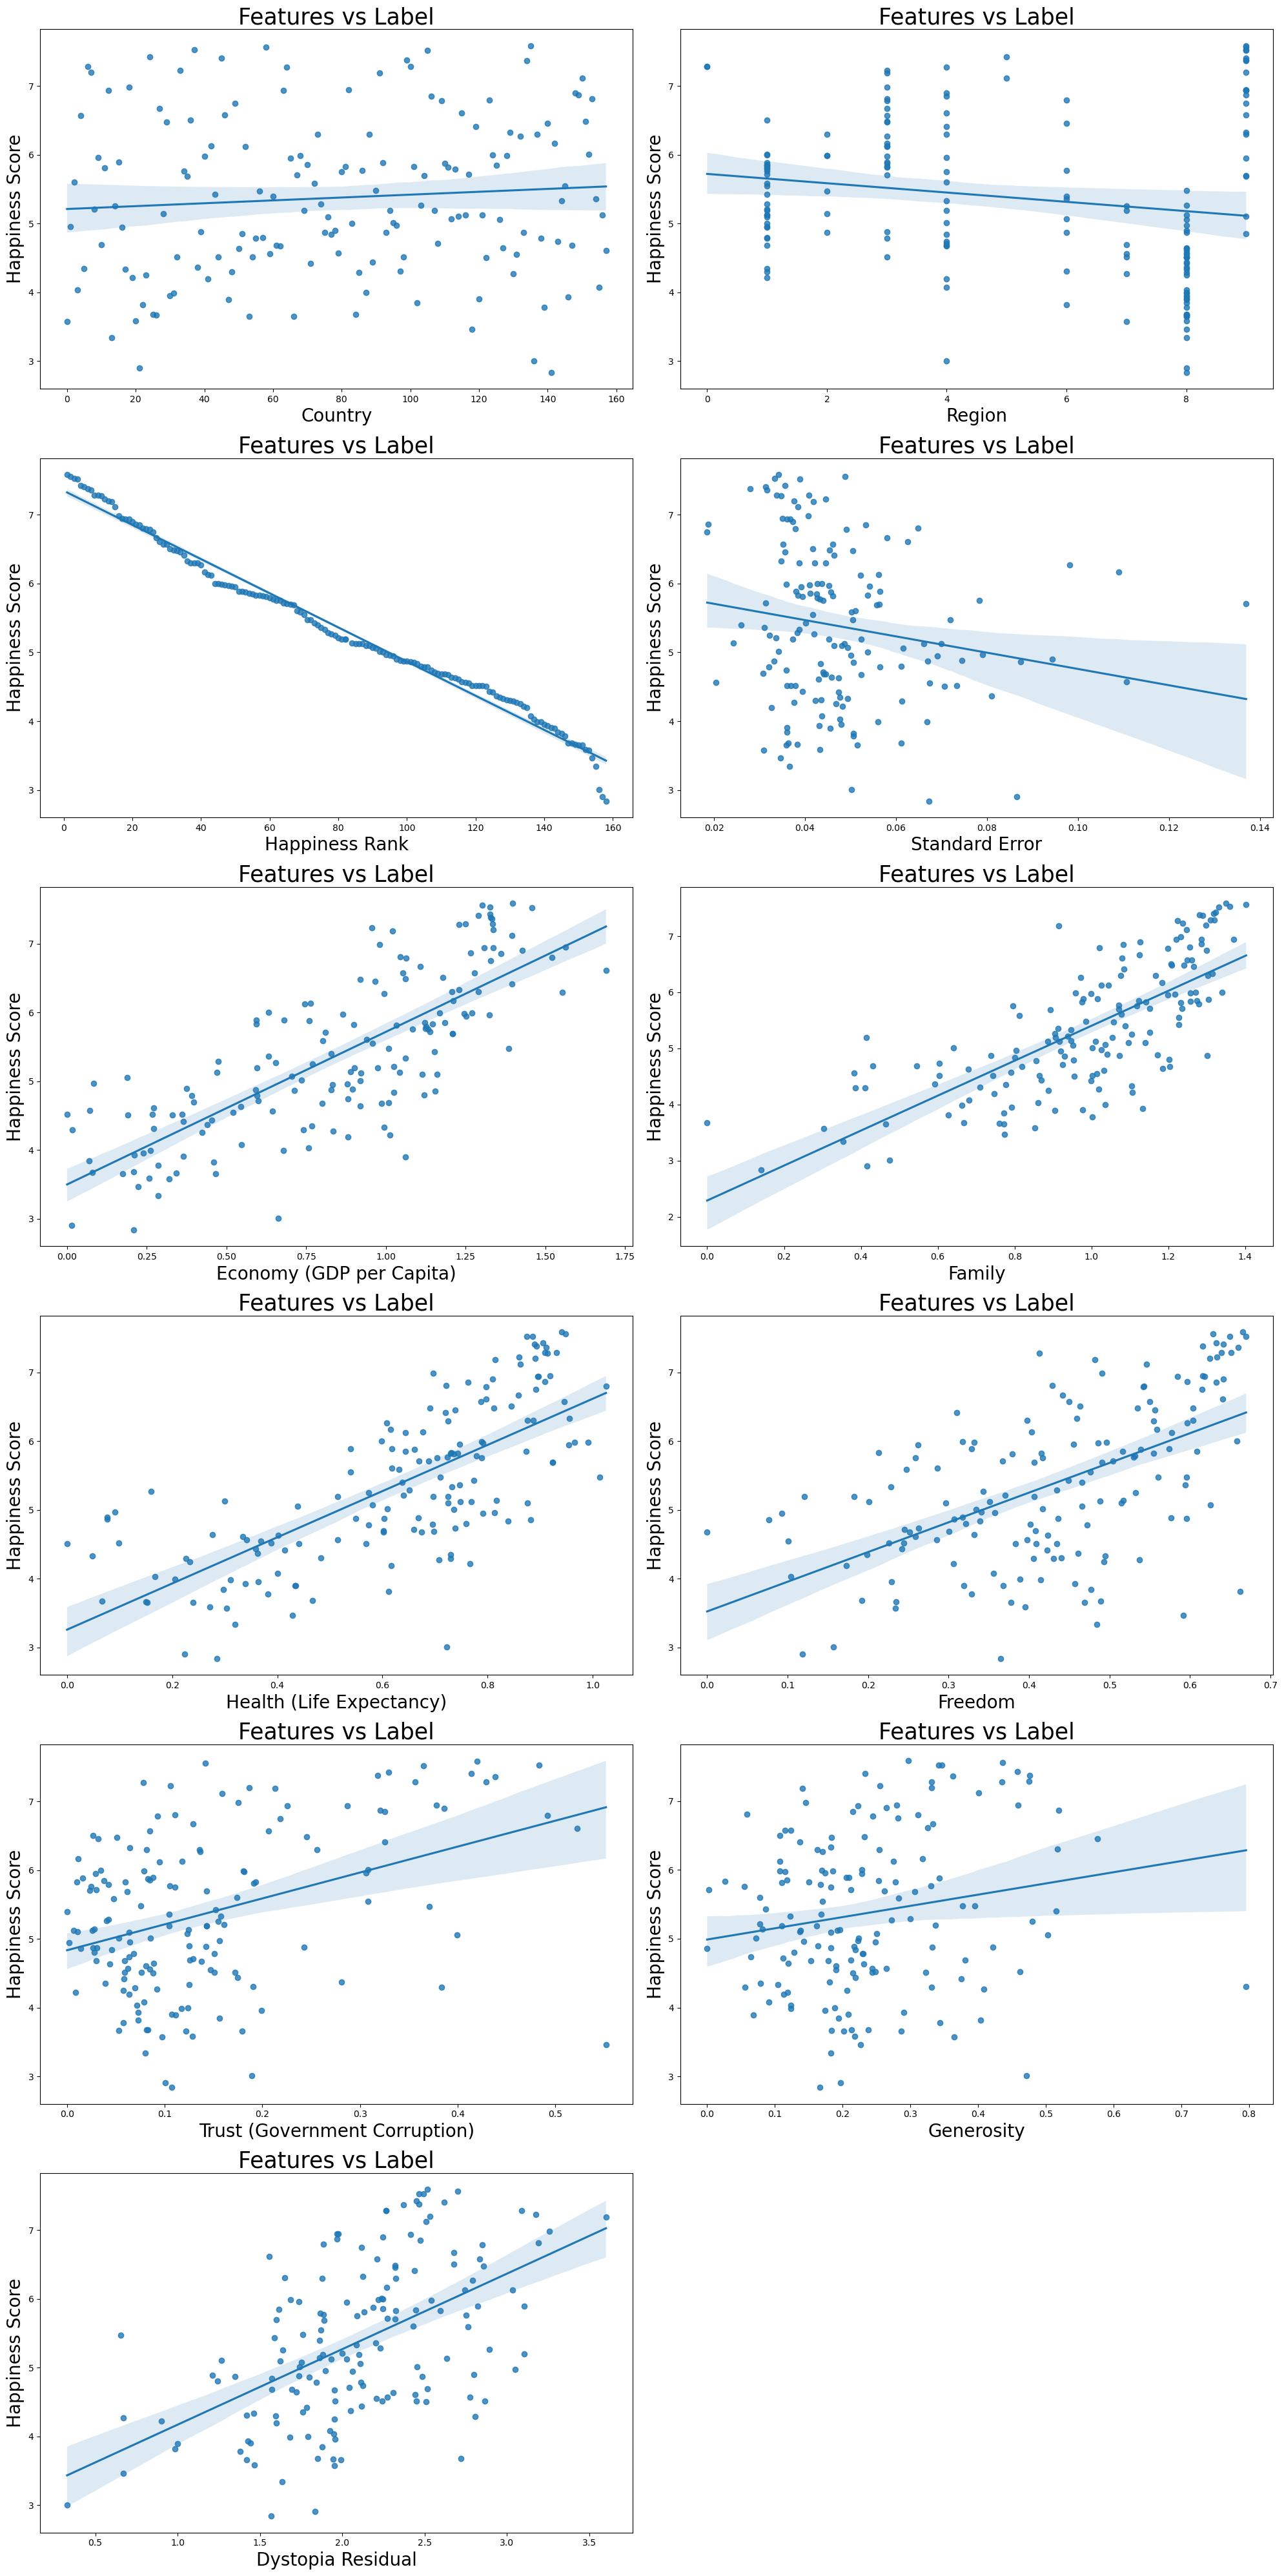

In [16]:
#Relationship between Features and Target variable
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in x.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        sns.regplot(x[i], y)
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('Happiness Score', fontsize = 20)
        plt.title('Features vs Label', fontsize = 25)
    plotnumber+=1 
plt.tight_layout()  

## Observation:
- Postive correlation between Features vs label - Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Genorsity, and Dystopia Resuidual.
- Strong Negative correlation betweeen Features vs label - Happiness Rank. 
- No correlation between Features vs label - Country, Region, and Standard Error.

In [17]:
## Remove skewness
from scipy.stats import yeojohnson
skewed_columns  = ['Standard Error', 'Trust (Government Corruption)', 'Generosity' ,'Family', 'Health (Life Expectancy)']
for i in skewed_columns:
    df[i], _ = yeojohnson(df[i])

df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

## Observation:
No skewness found

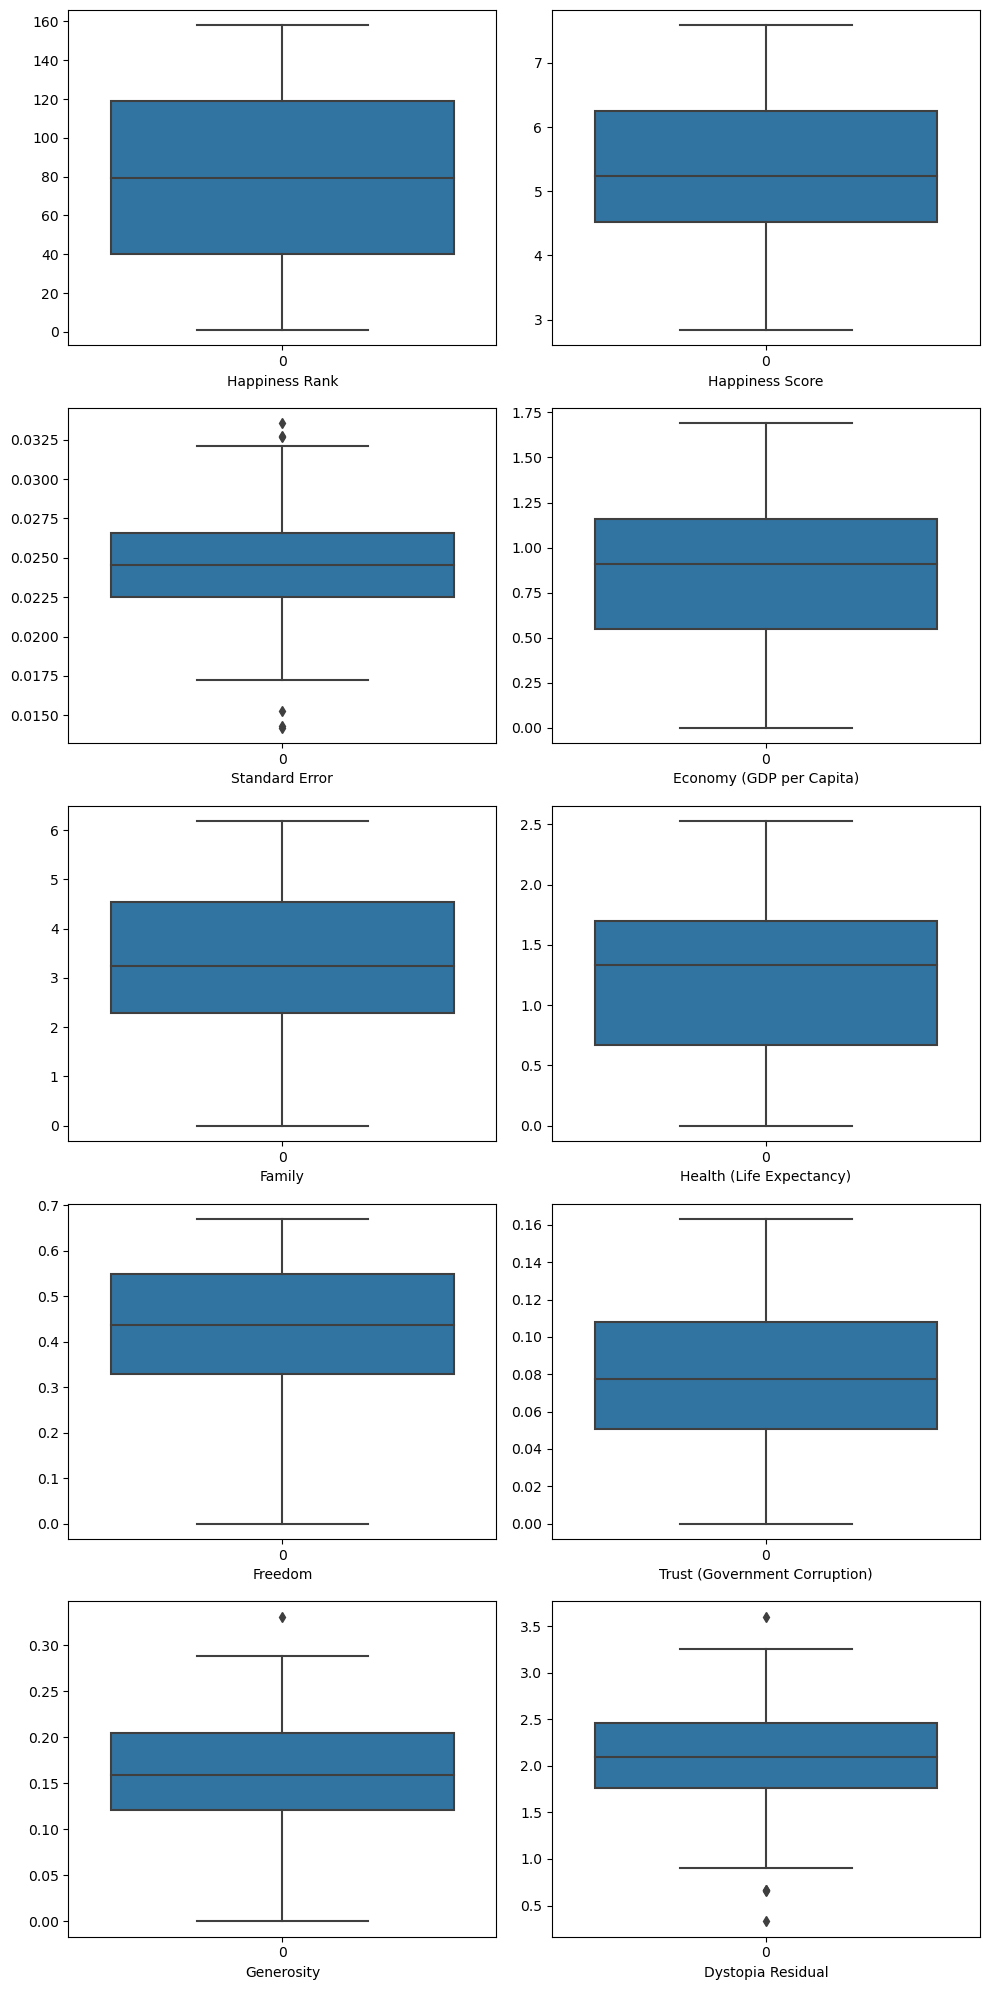

In [18]:
## Checking Outliers
plt.figure(figsize = (10, 20))
number = 1
for col in numerical_col:
    if number <= 10:
        plt.subplot(5, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)
    number+=1
plt.tight_layout()  

### Observations:
Following columns have outliers (Standard Error, Generosity, Dystopia Residual) 

In [19]:
## removing outliers with IQR
outlier_columns = df[['Standard Error', 'Generosity', 'Dystopia Residual']]
q1 = outlier_columns.quantile(0.25)
q3 = outlier_columns.quantile(0.75) 
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = ((outlier_columns < lower_bound) | (outlier_columns > upper_bound).any(axis=1))
df1 = df[~outliers]
old_data = df.shape[0]
new_data = df1.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 158
New data =  158
Loss data in percentage =  0.0


In [20]:
## removing outliers with z score
from scipy.stats import zscore
outlier_columns = ['Standard Error', 'Generosity', 'Dystopia Residual']
z = np.abs(zscore(df[outlier_columns]))
outlier_mask = (z < 3).all(axis=1)
df2 = df[outlier_mask]
old_data = df.shape[0]
new_data = df2.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 158
New data =  155
Loss data in percentage =  1.89873417721519


## Observation:
Will go further with Z score

In [21]:
df = df2
df.shape

(155, 12)

### Check Multicollinearity betweeen all columns

In [22]:
cor = df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.000507,-0.107605,0.095660,0.030566,0.036798,0.153113,0.017429,0.097462,0.028190,0.098176,0.008958
Region,0.000507,1.000000,0.245335,-0.209758,-0.025166,-0.285562,-0.165092,-0.315236,0.070997,0.198755,0.293616,-0.065844
Happiness Rank,-0.107605,0.245335,1.000000,-0.992306,0.163443,-0.784366,-0.759715,-0.763089,-0.539719,-0.316402,-0.164083,-0.516350
Happiness Score,0.095660,-0.209758,-0.992306,1.000000,-0.183681,0.782586,0.764154,0.759266,0.549270,0.340872,0.189519,0.519518
Standard Error,0.030566,-0.025166,0.163443,-0.183681,1.000000,-0.189610,-0.145309,-0.291444,-0.147756,-0.119546,-0.062123,0.042491
Economy (GDP per Capita),0.036798,-0.285562,-0.784366,0.782586,-0.189610,1.000000,0.657664,0.837051,0.358272,0.204667,-0.048119,0.033802
Family,0.153113,-0.165092,-0.759715,0.764154,-0.145309,0.657664,1.000000,0.580765,0.482263,0.181560,0.130037,0.147889
Health (Life Expectancy),0.017429,-0.315236,-0.763089,0.759266,-0.291444,0.837051,0.580765,1.000000,0.377941,0.170926,0.077236,0.045637
Freedom,0.097462,0.070997,-0.539719,0.549270,-0.147756,0.358272,0.482263,0.377941,1.000000,0.469579,0.413942,0.029052
Trust (Government Corruption),0.028190,0.198755,-0.316402,0.340872,-0.119546,0.204667,0.181560,0.170926,0.469579,1.000000,0.245480,0.029448


<AxesSubplot:>

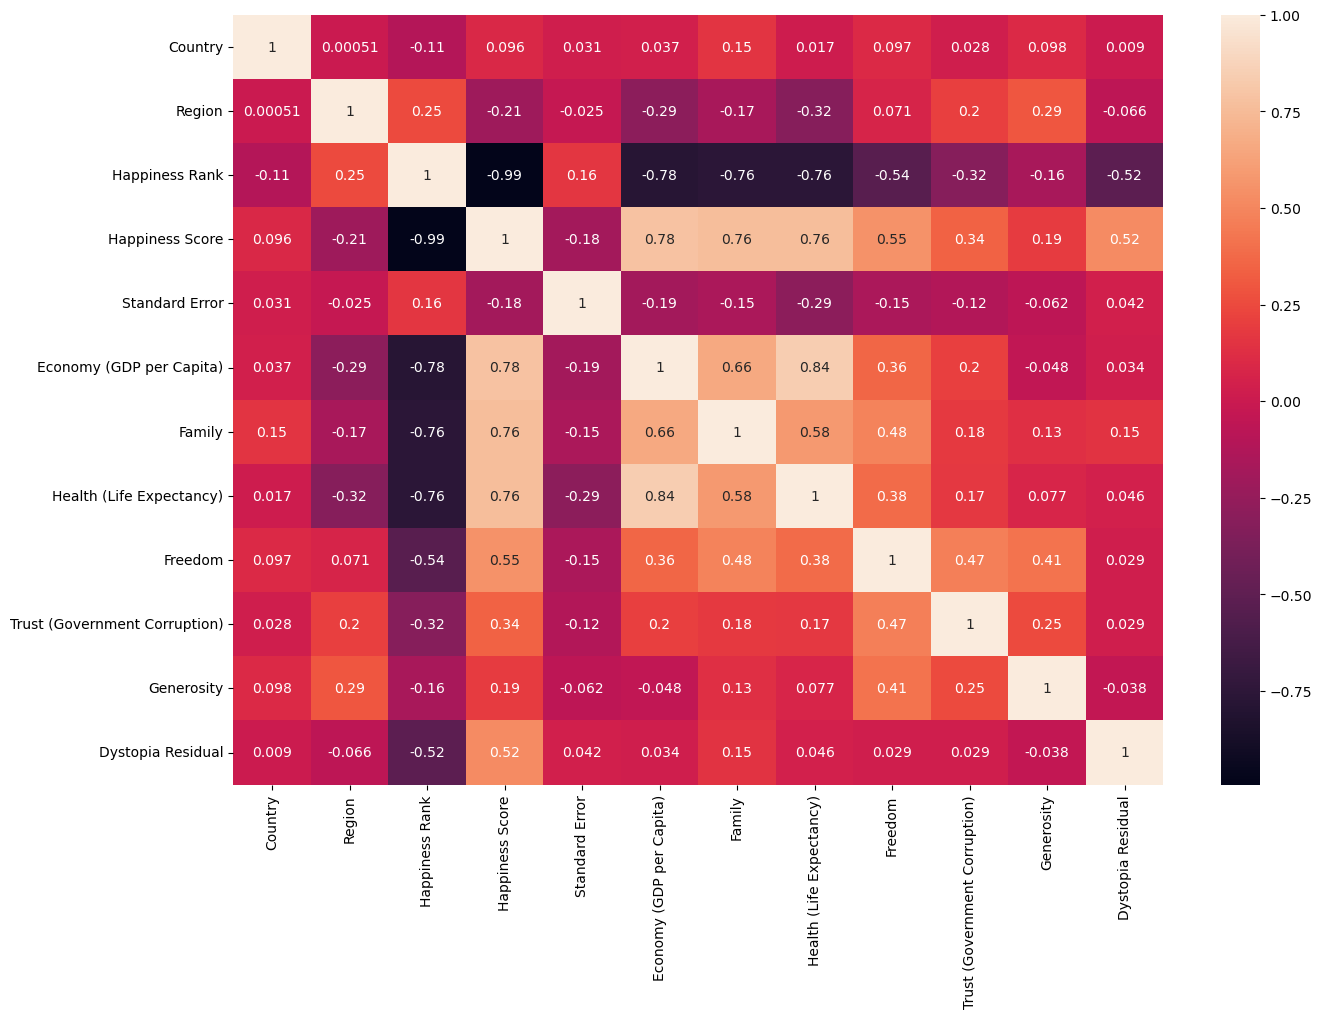

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(cor, annot=True)

### Observations:
- Following features (Dystopia Residual, Freedom, Health (Life Expectancy), Family, Economy (GDP per Capita)) having postive correlation with label (Happiness Score).
- Following features (Happiness Rank) having strong negative correlation with label (Happiness Score)
- Also, noticed "Happiness Rank" having multiple collinearity with following features (Health (Life Expectancy), Family, Economy (GDP per Capita)).
- Looking multicollinearity we can check for dropping Happiness Rank
- Due to no relation between Country with target variable, will drop it.

In [24]:
x = df.drop(columns = ['Country', 'Happiness Rank', 'Happiness Score'])
y = df['Happiness Score']

### Features Scaling and using Standard Scalrization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.316968,-1.066926,1.380093,1.693740,1.510438,1.596782,1.798259,0.656292,0.754539
1,1.316968,0.287784,1.145880,2.040435,1.551048,1.349348,0.337096,1.525180,1.097451
2,1.316968,-1.161840,1.203470,1.764893,1.103634,1.487925,1.931349,0.965534,0.707475
3,1.316968,-0.571568,1.535481,1.576376,1.166051,1.624753,1.647950,1.002074,0.657829
4,-0.025993,-0.909763,1.205484,1.524420,1.288709,1.377588,1.527165,1.637741,0.632663
...,...,...,...,...,...,...,...,...,...
150,0.645488,-1.454533,-1.297205,-1.985839,-1.303591,-1.304041,-0.176676,1.117001,-0.295353
151,0.981228,-1.007506,-1.540245,-0.964244,-0.922354,1.102184,2.037644,0.092534,-2.675812
152,0.981228,-0.799755,-1.379686,-1.911297,-1.259608,0.379314,-0.414361,-0.311723,-0.887496
153,0.981228,1.997643,-2.054425,-1.810360,-1.508973,-2.081574,-0.131860,-0.170715,-0.516520


In [26]:
x = x1

In [27]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,1.328693,Region
1,1.131289,Standard Error
2,4.422496,Economy (GDP per Capita)
3,2.111449,Family
4,3.990122,Health (Life Expectancy)
5,1.878043,Freedom
6,1.373081,Trust (Government Corruption)
7,1.431776,Generosity
8,1.045031,Dystopia Residual


### Observation:
- Confirmed no multicollinearity between features

### Modelling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [29]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1, y, test_size = 0.25, random_state = 300)

In [30]:
### Classsification Models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [31]:
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BR =  BaggingRegressor()
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DTR = DecisionTreeRegressor()
KNR = KNeighborsRegressor()

In [32]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print('R2 score: ', r2_score(y_train, y_pred)*100)
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print("R2 Score:  ", r2_score(y_test, pred)*100)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test, pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
        print('\n')

In [33]:
models = [('RFR', RFR), ('ETR', ETR), ('GBR', GBR), ('ABR', ABR), ('BR', BR),  ('LR', LR), ('Lasso', lasso), ('Ridge', ridge), ('DTR', DTR), ('KNR', KNR)]
for model_name, model in models:
    model.fit(x_train, y_train)    

In [34]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFR

---------------Train Result---------------
R2 score:  98.59423481693118

---------------Test Result---------------
R2 Score:   91.47025803877193
Mean Absolute Error:  0.24696871794871766
Mean Squared Error:  0.12468750766666652
Root Mean Squared Error:  0.3531111831515203


Model Name: ETR

---------------Train Result---------------
R2 score:  100.0

---------------Test Result---------------
R2 Score:   92.79822085457727
Mean Absolute Error:  0.24984769230769197
Mean Squared Error:  0.10527538775384596
Root Mean Squared Error:  0.3244616891928012


Model Name: GBR

---------------Train Result---------------
R2 score:  99.92573262693529

---------------Test Result---------------
R2 Score:   94.09624693131158
Mean Absolute Error:  0.2232181805142399
Mean Squared Error:  0.08630088217911461
Root Mean Squared Error:  0.2937701179138454


Model Name: ABR

---------------Train Result---------------
R2 score:  95.31438607462921

---------------Test Result---------------
R2 Sc

### Cross Validation to check whether selected models are over fitting

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
for model_name, model in models:
    score = cross_val_score(model, x1, y, cv=5)
    print(f"Model Name: {model_name}")
    print('R2 Score = ',r2_score(y_test, model.predict(x_test))*100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between R2 Score and Cross Validation Score = ', r2_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFR
R2 Score =  91.47025803877193
Cross validation score =  -326.761789412067
Difference between R2 Score and Cross Validation Score =  4.182320474508389


Model Name: ETR
R2 Score =  92.79822085457727
Cross validation score =  -295.76589629174555
Difference between R2 Score and Cross Validation Score =  3.885641171463228


Model Name: GBR
R2 Score =  94.09624693131158
Cross validation score =  -215.00940009207525
Difference between R2 Score and Cross Validation Score =  3.0910564702338683


Model Name: ABR
R2 Score =  88.16725492187155
Cross validation score =  -551.0046844570512
Difference between R2 Score and Cross Validation Score =  6.391719393789227


Model Name: BR
R2 Score =  91.93915451187154
Cross validation score =  -407.25850418094797
Difference between R2 Score and Cross Validation Score =  4.991976586928195


Model Name: LR
R2 Score =  99.73270504573527
Cross validation score =  84.32969616156134
Difference between R2 Score and Cross Validation Score =  0.1540

### Conclusion:
- Ridge is the best model, as difference between accuracy score and cross validation score is least compares to others model.

### Hyper parameter tuning for ABR Model

In [37]:
## Ridge
from sklearn.model_selection import GridSearchCV

In [38]:
base_regressor = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [39]:
gridsearch = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [40]:
gridsearch.best_params_

{'alpha': 0.01}

In [41]:
Final_model = Ridge(alpha = 0.01)
Final_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [42]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  99.29778171088735

---------------Test Result---------------
R2 Score:   99.7325444720441
Mean Absolute Error:  0.05411782558000581
Mean Squared Error:  0.003909656745078472
Root Mean Squared Error:  0.06252724802099059




### Saving the final model

In [43]:
import pickle

In [44]:
pickle.dump(Final_model, open('World Happiness Report Project','wb'))

In [45]:
## Do the predication
loaded_model = pickle.load(open('World Happiness Report Project','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
df.head()

,Predicted,Original
0,7.338404,7.378
1,3.081664,2.905
2,5.260180,5.194
3,4.547928,4.633
4,6.044947,6.130


In [46]:
print("R2 Score:  ", r2_score(y_test, predicted)*100)

R2 Score:   99.7325444720441
